<a href="https://colab.research.google.com/github/danielgrgurevic/Desafios_Bootcamp_DL/blob/main/Desaf%C3%ADo_Prediciendo_las_ventas_de_una_tienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.- IMPORTACIÓN Y LIMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Data science/Desafío Latam/5 - Machine Learning /Desafío 6/Sales_Data.xlsx')

In [3]:
df.head()

,Order Date,Sales
0,2015-01-01,14205.707
1,2015-02-01,4519.892
2,2015-03-01,55205.797
3,2015-04-01,27906.855
4,2015-05-01,23644.303


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  48 non-null     datetime64[ns]
 1   Sales       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


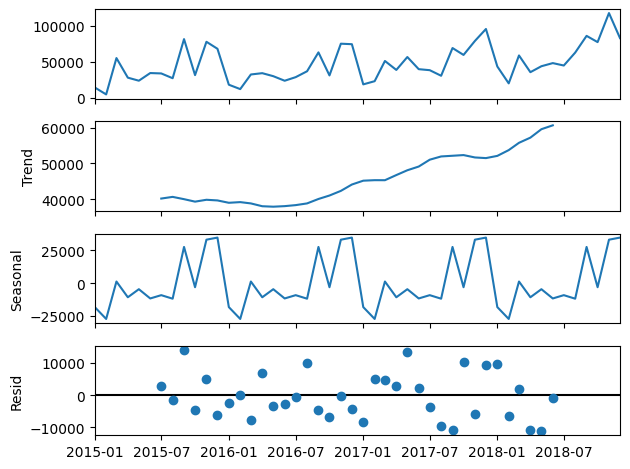

In [6]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Descomposición de la serie de tiempo
decomposition = seasonal_decompose(df, model='additive', period=12)

# Gráficos de la descomposición
decomposition.plot()
plt.show()

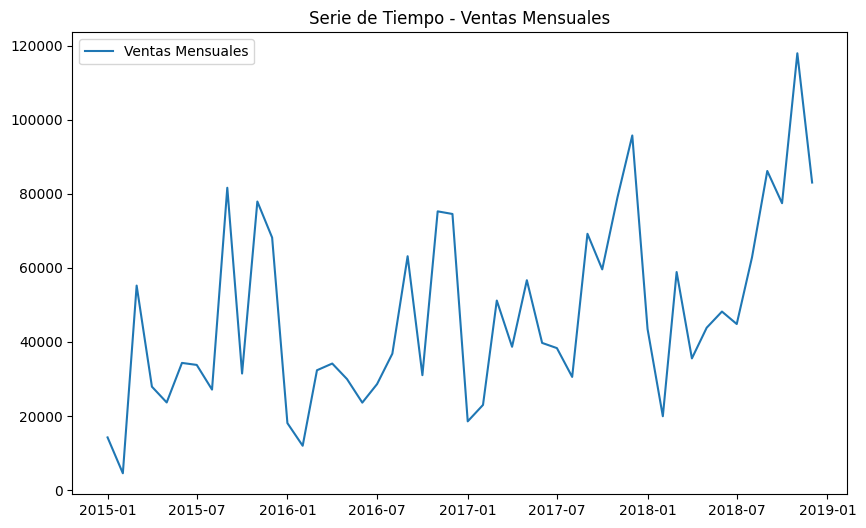

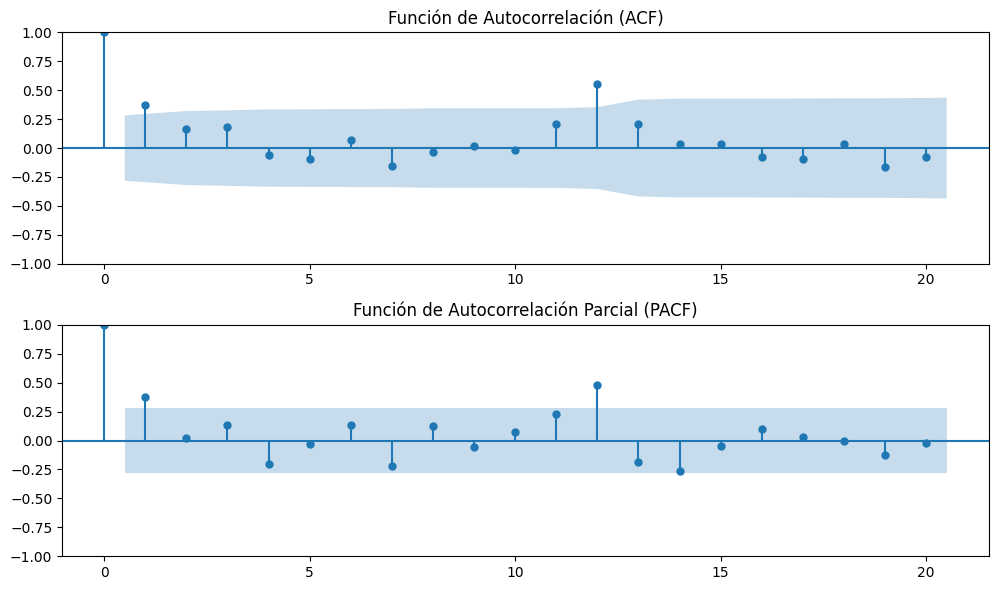

Estadístico ADF: -4.416136761430769
p-valor: 0.00027791039276670623
Valores críticos: {'1%': -3.5778480370438146, '5%': -2.925338105429433, '10%': -2.6007735310095064}
La serie es estacionaria, no es necesario diferenciarla.


In [9]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Graficar la serie original para observar patrones
plt.figure(figsize=(10,6))
plt.plot(df, label='Ventas Mensuales')
plt.title('Serie de Tiempo - Ventas Mensuales')
plt.legend()
plt.show()

# Paso 1: Graficar ACF y PACF
plt.figure(figsize=(10,6))
plt.subplot(211)
plot_acf(df.dropna(), ax=plt.gca(), lags=20)
plt.title('Función de Autocorrelación (ACF)')

plt.subplot(212)
plot_pacf(df.dropna(), ax=plt.gca(), lags=20)
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.tight_layout()
plt.show()

# Paso 2: Test de Dickey-Fuller aumentado
adf_test = adfuller(df.dropna())
print('Estadístico ADF:', adf_test[0])
print('p-valor:', adf_test[1])
print('Valores críticos:', adf_test[4])

if adf_test[1] > 0.05:
    print("La serie no es estacionaria, es necesario diferenciarla.")
else:
    print("La serie es estacionaria, no es necesario diferenciarla.")


Valor de p (orden autorregresivo, AR): Dado que la PACF muestra un valor significativo en el rezago 1 y cae bruscamente en los rezagos siguientes, podemos sugerir que p=1.
Valor de q(orden de media móvil, MA): La ACF muestra una correlación positiva en el rezago 1, pero cae rápidamente a valores cercanos a cero. Esto sugiere que un modelo MA de orden q=1podría capturar la relación.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -549.516
Date:                Sat, 12 Oct 2024   AIC                           1107.033
Time:                        15:01:21   BIC                           1114.518
Sample:                    01-01-2015   HQIC                          1109.861
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.712e+04   6372.221      7.394      0.000    3.46e+04    5.96e+04
ar.L1          0.6655      0.280      2.373      0.018       0.116       1.215
ma.L1         -0.3053      0.353     -0.865      0.3

<ipython-input-15-2fd4d3d6ca94>:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=n_months+1, freq='M')[1:], forecast, label='Predicciones', color='orange')


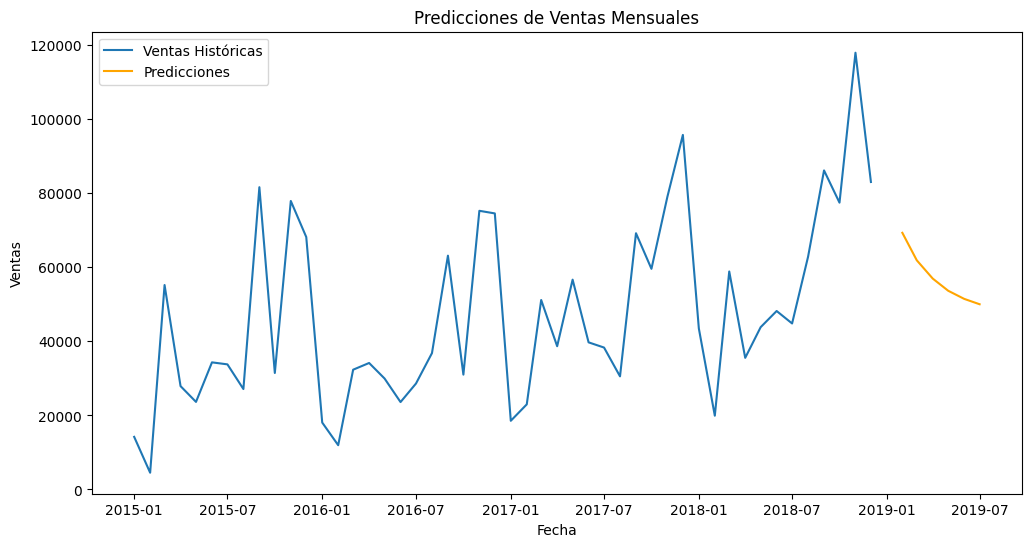

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA(1, 0, 1)
model = ARIMA(df['Sales'], order=(1, 0, 1))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Realizar predicciones para los próximos meses
# Definimos el número de meses a predecir
n_months = 6
forecast = model_fit.forecast(steps=n_months)

# Mostrar las predicciones
print("Predicciones para los próximos meses:")
print(forecast)

# Graficar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Ventas Históricas')
plt.plot(pd.date_range(start=df.index[-1], periods=n_months+1, freq='M')[1:], forecast, label='Predicciones', color='orange')
plt.title('Predicciones de Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error Cuadrático Medio (MSE): 1153031860.4436069
Error Absoluto Medio (MAE): 25478.756171058893


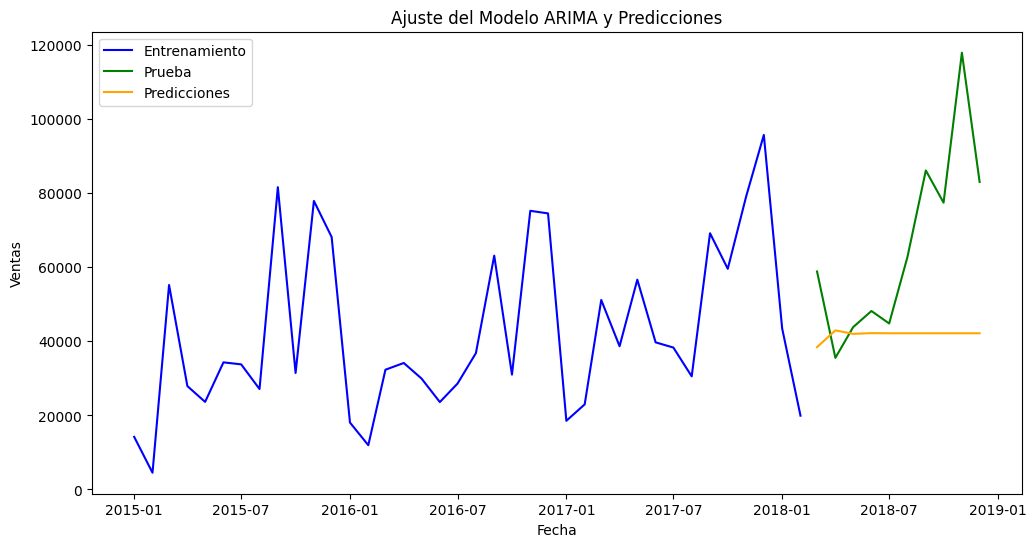

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_size = int(len(df) * 0.8)  # 80% para entrenamiento
train, test = df['Sales'][:train_size], df['Sales'][train_size:]

# Ajustar el modelo ARIMA(1, 0, 1) en el conjunto de entrenamiento
model = ARIMA(train, order=(1, 0, 1))
model_fit = model.fit()

# Realizar predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))

# Calcular métricas de evaluación
mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Error Absoluto Medio (MAE): {mae}")

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entrenamiento', color='blue')
plt.plot(test.index, test, label='Prueba', color='green')
plt.plot(test.index, predictions, label='Predicciones', color='orange')
plt.title('Ajuste del Modelo ARIMA y Predicciones')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()
